#Bibliotecas

In [ ]:
import sympy as sp
import numpy as np
import math as mt
import tabulate as tab
import matplotlib.pyplot as plt

#Função para plotar gráficos


In [ ]:
def plotar(f1, f2, titulo, limite1, limite2):
  aux = []
  inicio = limite1
  fim = limite2
  nro_de_pontos = 1000
  plt.axhline(y=0, color = "black", linestyle = '--')
  curva = np.linspace(inicio, fim, nro_de_pontos)

  valores = [f1(valor) for valor in curva]
  plt.plot(curva, valores, color = "black", linestyle='-')

  valores2 = [f2(valor2) for valor2 in curva]
  plt.plot(curva, valores2, color = "red",  linestyle='-')


  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid()
  plt.show()


#Métodos

##Eliminação de Gauss

In [ ]:
def gauss(A, b, n):
  det = 1.0
  info = 0.0
  for j in range(0, n):
    p = j
    #Escolha do pivô
    Amax = abs(A[j][j])
    for k in range (j+1, n):
      if(abs(A[k][j]) > Amax):
        Amax = abs(A[k][j])
        p = k

    if p != j:#Troca de linha
      for k in range (0, n):
        temp = A[j][k]
        A[j][k] = A[p][k]
        A[p][k] = temp
      temp = b[j]
      b[j] = b[p]
      b[p] = temp
      det = -det

    det = det*A[j][j]

    #Eliminação de Gauss
    if abs(A[j][j] != 0):
      r = 1/A[j][j]

      for i in range(j+1, n):
        mult = A[i][j]*r
        A[i][j] = 0
        for k in range(j+1, n):
          A[i][k] = A[i][k] - mult*A[j][k]

        b[i] = b[i] - mult*b[j]

    else:
      if info == 0.0:
        info = j

  det = det*A[n-1][n-1]
  if (info == 0) & (abs(A[n-1][n-1]) == 0):
    info = n

  return np.linalg.solve(A, b)


In [ ]:
gauss(([1.5, 5.4, 3.3], [4.2, 2.3, 4.5], [2.7, 5.7, 7.8]), [10, 11.7, 8.9], 3)

array([ 3.12522145,  1.71216783, -1.19198135])

Gauss com arredondamento em 3 casas

In [ ]:
def gaussA(A, b, n):
  det = 1.0
  info = 0.0
  for j in range(0, n):
    p = j
    #Escolha do pivô
    Amax = abs(A[j][j])
    for k in range (j+1, n):
      if(abs(A[k][j]) > Amax):
        Amax = abs(A[k][j])
        p = k

    if p != j:#Troca de linha
      for k in range (0, n):
        temp = A[j][k]
        A[j][k] = A[p][k]
        A[p][k] = temp
      temp = b[j]
      b[j] = b[p]
      b[p] = temp
      det = -det

    det = det*A[j][j]

    #Eliminação de Gauss
    if abs(A[j][j] != 0):
      r = 1/A[j][j]
      r = round(r, 3)

      for i in range(j+1, n):
        mult = round(A[i][j]*r, 3)
        A[i][j] = 0
        for k in range(j+1, n):
          A[i][k] = round(A[i][k] - mult*A[j][k],3)

        b[i] = round(b[i] - mult*b[j],3)

    else:
      if info == 0.0:
        info = j

  det = det*A[n-1][n-1]
  if (info == 0) & (abs(A[n-1][n-1]) == 0):
    info = n

  return np.linalg.solve(A, b)

##Fatoração LU

In [ ]:
def LU(linhas, colunas, A, b):
  '''pivo = [0 for _ in range(linhas)]
  for i in range(0, linhas):
    pivo[i] = i

  PdU = 1
  info = 0
  for j in range(0, min(linhas, colunas)):
    #Escolha do pivô
    p = j
    Amax = abs(A[j][j])
    for k in range(j+1, linhas):


      if (abs(A[k][j])>Amax):
        Amax = abs(A[k][j])
        p = k


    if p != j:#Troca linhas
      for k in range(0, colunas):
        t = A[j][k]
        A[j][k] = A[p][k]
        A[p][k] = t



      i = pivo[j]
      pivo[j] = pivo[p]
      pivo[p] = i
      PdU = -PdU
    PdU = PdU * A[j][j]
    #Gauss

  if A[j][j] != 0:
    r = A[j][j]

    for i in range(j+1, linhas):
      Mult = A[i][j]/r
      A[i][j] = Mult

      for k in range(j+1, colunas):
        A[i][k] = A[i][k] - Mult*A[j][k]

  else:
    if info == 0:
      info = j


  pivoout = pivo

  for i in range(0, linhas):
    if pivo[i] != i:
      temp = b[i]
      b[i] = b[pivo[i]]
      b[pivo[i]] = temp

      temp = pivo[i]
      pivo[i] = pivo[temp]
      pivo[temp] = temp

  print(A)
  soluc = [solucLU(linhas, A, b)]

  #print(soluc)
  #print(pivo)

  return soluc
'''
  pivot = [0 for _ in range(linhas)]
  for i in range(0, linhas):
    pivot[i] = i

  PdU = 1
  info = 0

  for j in range(0, min(linhas, colunas)):
    p = j
    Amax = abs(A[j][j])

    for k in range(j+1, linhas):
      if abs(A[k][j]) > Amax:
        Amax = abs(A[k][j])
        p = k

    if p != j:#troca linhas
      for k in range(0, colunas):
        t = A[j][k]
        A[j][k] = A[p][k]
        A[p][k] = t

        t = b[j]
        b[j] = b[p]
        b[p] = t
      i = pivot[j]
      pivot[j] = pivot[p]
      pivot[p] = i
      PdU = -PdU

    PdU = PdU * A[j][j]

    #Gauss

    if abs(A[j][j]) != 0:
      r = A[j][j]
      for i in range(j+1, linhas):
        Mult = A[i][j] / r
        A[i][j] = Mult
        for k in range(j+1, colunas):
          A[i][k] = A[i][k] - Mult * A[j][k]

    else:

      if info == 0:
        info = j

  pivoout = pivot

  '''for i in range(0, linhas):
    if pivot[i] != i:
      print(pivot)
      print(b)
      temp = b[i]
      b[i] = b[pivot[i]]
      b[pivot[i]] = temp

      temp = pivot[i]
      pivot[i] = pivot[temp]
      pivot[temp] = temp'''
  solucLU(linhas, A, b)
  return


In [ ]:
#LU(3, 3, ([1,1,1],[1,1,1],[1,1,1]), [1,1,1])

In [ ]:
def solucLU(ordem, A, b):
  #L*U*x = b
  U = [[0 for _ in range(ordem)] for _ in range(ordem)]
  L = [[0 for _ in range(ordem)] for _ in range(ordem)]



  for j in range(0, ordem):
    for k in range(0, ordem):
      if k >= j:
        U[j][k] = A[j][k]
        if k == j:
          L[j][k] = 1
      else:
        L[j][k] = A[j][k]




  y = np.linalg.solve(L, b)

  sol = np.linalg.solve(U, y)
  s = sol.tolist()

  print("Vetor Solução:\n", s)
  print("\nMatriz L:\n", tab.tabulate(L))
  print("Matriz U:\n", tab.tabulate(U))

  return
  #return print("Vetor Solução:\n", s), print("Matriz L:\n", tab.tabulate(L)), print("Matriz U:\n", tab.tabulate(U))



In [ ]:
def verificaLU(ordem, A):

  if ordem == 1 and A[0] == 0:
    print("A matriz não pode ser fatorada em L e U")
    return A
  else:
    for i in range(1, ordem+1):
      A_ = [[0 for _ in range(i)] for _ in range(i)]
      for j in range(0, i):
        for k in range(0, i):
          A_[j][k] = A[j][k]

      detA_ = np.linalg.det(A_)

      if detA_ == 0:
        print("A matriz não pode ser fatorada em L e U")
        return

  print("A matriz pode ser fatorada em L e U")
  return


In [ ]:
LU(3, 3, [[3, 2, 4], [1, 1, 2], [4, 3, -2]], [1, 2, 3])

#verificaLU(3, [[1, 2, 1], [1, 1, 2], [4, 3, -2]])

Vetor Solução:
 [-3.0, 5.0, 0.0]

Matriz L:
 ----  --  -
1      0  0
0.25   1  0
0.75  -1  1
----  --  -
Matriz U:
 -  ----  ----
4  3     -2
0  0.25   2.5
0  0      8
-  ----  ----


##Algoritmo Cholesky

In [ ]:
def cholesky(ordem, A, b):
  det = 1
  info = 0
  G = [[0 for _ in range(ordem)] for _ in range(ordem)]
  for j in range(0, ordem):
    soma = 0
    for k in range(0, j):
      soma = soma + (A[j][k] * A[j][k])


    t = A[j][j] - soma

    if t>0:
      A[j][j] = mt.sqrt(t)
      r = A[j][j]
      G[j][j] = A[j][j]
      det *= t
    else:
      info = j
      print("Matriz não é definida positiva")
      return 0

    for i in range(j+1, ordem):
      soma = 0

      for k in range(0, j-1):
        soma += A[i][k]*A[j][k]

      A[i][j] = (A[i][j] - soma) / r
      G[i][j] = A[i][j]

  #Traspõe G
  GT= [[0 for _ in range(ordem)] for _ in range(ordem)]

  for j in range(0, ordem):
    for k in range(0, ordem):
      GT[j][k] = G[k][j]

  #Calcula G*y = b
  y = np.linalg.solve(G, b)

  #Calcula GT*X = y

  return np.linalg.solve(GT, y)



In [ ]:
def verificaCholesky(ordem, A):


  if ordem == 1 and A[0] == 0:
    print("A matriz não pode ser fatorada por Cholensky")
    return A
  else:
    for i in range(1, ordem+1):
      A_ = [[0 for _ in range(i)] for _ in range(i)]
      for j in range(0, i):
        for k in range(0, i):
          if A[j][k] == A[k][j]:
            A_[j][k] = A[j][k]
          else:
            print("A matriz não pode ser fatorada por Cholesky")
            return

      detA_ = np.linalg.det(A_)

      if detA_ <= 0:
        print("A matriz não pode ser fatorada por Cholesky")
        return

  print("A matriz pode ser fatorada por Cholesky")
  return

In [ ]:
cholesky(3, ([1, 1, 0], [1, 2, -1], [0, -1, 3]), (2, 1, 5))
verificaCholesky(3, ([1, 1, 0], [1, 2, -1], [0, -1, 3]))

A matriz pode ser fatorada por Cholesky


##Algoritmo de Gauss-Jacobi

In [ ]:
def gauss_Jacobi(Ordem, A, b, Tol, maxIt):
  x = Ordem*[None]
  v = Ordem*[None]

  for i in range (0, Ordem):
    x[i] = b[i]/A[i][i]
  It = 0
    #Iterações de Jacobi
  NormaRel = Tol+1
  while(NormaRel > Tol and It < maxIt):
    It += 1
    for i in range(0, Ordem):
      Soma = 0
      for j in range(0, Ordem):
        if i != j:
          Soma += A[i][j] * x[j]

      v[i] = (b[i] - Soma)/A[i][i]

    NormaNum = 0
    NormaDen = 0
    for i in range(0, Ordem):
      t = abs(v[i]-x[i])
      if t > NormaNum:
        NormaNum = t
      if abs(v[i]) > NormaDen:
        NormaDen = abs(v[i])

      x[i] = v[i]

    NormaRel = NormaNum/NormaDen

    print(It, x, NormaRel)

  if NormaRel <= Tol:
    info = 0
  else:
    info = 1

  return x


In [ ]:
gauss_Jacobi(3, ([10, 2, 1], [1, 5, 1], [2, 3, 10]), [7, -8, 6], 0.05, 1000)

1 [0.96, -1.86, 0.9400000000000001] 0.18279569892473121
2 [0.9780000000000001, -1.98, 0.966] 0.060606060606060545
3 [0.9994, -1.9888, 0.9983999999999998] 0.016291230893000743


[0.9994, -1.9888, 0.9983999999999998]

##Gauss-Seidel

In [ ]:
def gauss_Seidel(Ordem, A, b, Tol, maxIt):
  x = Ordem*[None]
  v = Ordem*[None]
#Preenchendo o vetor x
  for i in range(0, Ordem):
    x[i] = b[i]/A[i][i]

  It = 0

  #It de Gauss-Seidel
  NormaRel = Tol+1
  while(NormaRel>Tol and It< maxIt):
    It += 1
    NormaNum = 0
    NormaDen = 0

    for i in range(0, Ordem):
      Soma = 0
      for j in range(0, Ordem):
        if i != j:
          Soma += A[i][j] * x[j]

      v[i] = x[i]
      x[i] = (b[i] - Soma)/A[i][i]
      t = abs(v[i] - x[i])

      if t > NormaNum:
        NormaNum = t
      if abs(x[i]) > NormaDen:
        NormaDen = abs(x[i])

    NormaRel = NormaNum/NormaDen

    print(It, x, NormaRel)
  if NormaRel <= Tol:
    Info = 0
  else:
    Info = 1

  return x



In [ ]:
gauss_Seidel(3, ([10, 2, 1], [1, 5, 1], [2, 3, 10]), [7, -8, 6], 0.01, 1000)

1 [0.96, -1.9120000000000001, 0.9816] 0.199581589958159
2 [0.9842400000000001, -1.993168, 1.0011024] 0.04072311014425272
3 [0.9985233600000001, -1.999925152, 1.0002728736] 0.0071419472802349985


[0.9985233600000001, -1.999925152, 1.0002728736]

#Relatório

##1:Resolver os sistemas lineares pelos métodos Fatoração LU e Cholesky, se possível.
Caso seja possível aplicar o método de Fatoração LU, encontre as matrizes L, U e o
vetor solução. E, caso seja possível aplicar o método de Fatoração de Cholesky,
encontre as matrizes G, GT e o vetor solução.

###Definindo as matrizes

In [ ]:
A1 = [[None]*3 for _ in range(3)]
A1 = [[1, -2, 1], [2, -2, 1], [3, -2, -2]]
B1 = [[None]*1 for _ in range(3)]
B1 = [0, 1, -1]

A2 = [[5, 2, 1], [-1, 4, 2], [2, -3, 10]]

B2 = [-12, 20, 3]


###Verificando se podem ser fatoradas em LU e por Cholesky

In [ ]:
print("Matriz 1:")
verificaLU(3, A1)
verificaCholesky(3, A1)

print("\nMatriz 2:")
verificaLU(3, A2)
verificaCholesky(3, A2)


Matriz 1:
A matriz pode ser fatorada em L e U
A matriz não pode ser fatorada por Cholesky

Matriz 2:
A matriz pode ser fatorada em L e U
A matriz não pode ser fatorada por Cholesky


###Aplicando fatoração por L e U

In [ ]:
print("Matriz 1:")
LU(3, 3, A1, B1)

print("Matriz 2:")
LU(3, 3, A2, B2)

Matriz 1:
Vetor Solução:
 [1.0, 0.9999999999999999, 1.0]

Matriz L:
 --------  ---  -
1         0    0
0.333333  1    0
0.666667  0.5  1
--------  ---  -
Matriz U:
 -  --------  --------
3  -2        -2
0  -1.33333   1.66667
0   0         1.5
-  --------  --------
Matriz 2:
Vetor Solução:
 [-4.0, 3.0, 2.0]

Matriz L:
 ----  ---------  -
 1     0         0
-0.2   1         0
 0.4  -0.863636  1
----  ---------  -
Matriz U:
 -  ---  ----
5  2     1
0  4.4   2.2
0  0    11.5
-  ---  ----


##2:No	dia	dos	namorados,	dois	rapazes	pretendem	comprar	um	ramo	de	flores,
com	rosas	e	tulipas,	para	oferecer	às	respectivas	namoradas.	Considere	x1	o	número
de	rosas	e	x2	o	número	de	tulipas	de	cada	ramo.

O	primeiro	rapaz	decidi comprar	o	ramo	"Mil	pétalas"	que	cobra	por	cada	rosa	2
reais	e	por	cada	tulipa	2	reais,	gastando	10	reais.

O	segundo	rapaz	decide	comprar	o	ramo	"Tudo	em	flor",	mas	a	florista	ainda	está
indecisa	no	preço	que	irá cobrar	por	cada	rosa	(considere	esse	preço	igual	a	"k")
cobrando-lhe	3	reais	por	cada	tulipa,	ficando	o	ramo	por	13	reais.

a)	Coloque	o	problema	na	forma	de	um	sistema	de	equações	lineares,	em	função
de	x1,	x2	e	k.

b)	 Calcule	 justificando,	 o	 valor	 de	 k, de	 forma	 a	 garantir	 a	 convergência	 do
método	 iterativo	 de	 Gauss-Jacobi na	 resolução	 do	 sistema	 (use	 apenas	 as
condições	suficientes	de	convergência	baseadas	na	matriz	dos	coeficientes,	A).

####A)



    2x1+2x2 = 10
    kx1+3x2 = 13

####B)

Matriz dos coeficientes
    

```
    |2 2|
    |k 3|
```
Para a convergência de Gauss-Jacobi, usarei o critério das linhas/colunas, ou seja, que a matriz seja estritamente diagonalmente dominante. Para tanto, os valores que estão na diagonal principal devem ser maiores que a soma dos módulos dos outros elementos de suas respectivas linhas/colunas. Neste caso:

    Linhas:
    2 > |2|
    3 > |k|
Neste caso, a convergência não pode ser garantida pois 2 não é maior que 2. Tentarei pelo critério das colunas

    Colunas:
    2 > |k|
    3 > |2|
Neste caso, existe a possibilidade de k assumir qualquer valor no seguinte intervalo

    0 <= k < 2

Escolherei 1 por questão de simplicidade.

Logo

    k = 1

##3:Uma	equipe de	três	paraquedistas	ligados	por	uma	corda	de	peso	desprezável	é lançada	em	queda	livre	a	uma	velocidade	v	=	5	m/s.

O	sistema	linear	resultante	permite	calcular	a	tensão	em	cada	secção	da	corda	(R	e
T	)	e	a	aceleração	da	equipe (a).

m1.	g	– c1.	v	– T									=	m1 .	a

m2.	g	– c2.	v	+	T	– R	=	m2 .	a

m3.	g	– c3.	v								+ R	=	m3 .	a

(considere	g	=	9.8	m/s2).

O	que	poderia	dizer	acerca	da	convergência	do	método	iterativo	de	Gauss-Seidel
quando	aplicado	ao	sistema?	Justifique

O sistema, preenchido de acordo com a tabela fornecida, é:
    
    70*9.8 - 10*5 - T = 70*a
    60*9.8 - 14*5 + T - R = 60*a
    40*9.8 - 17*5 + R = 40*a

Arrumando pra ficar mais fácil de enxergar

    70*a + T = 636
    60*a - T + R = 518
    40*a - R = 307

A matriz dos coeficientes será:

    70  1  0
    60 -1  1
    40  0 -1

O método iterativo de Gauss-Seidel tem as mesmas condições de convergência que Gauss-Jacobi, porém com a adição do critério de Sassenfield
    Linhas
    70 > 1
    1> 61
    1> 40

    Colunas
    70> 100
    1 > 1
    1 > 1

Os critérios de linhas e colunas não são satisfeitos, logo testaremos o critério de Sassenfield

    B1 = 1/70<1
    B2 = 60*1/70+1 = 1.8571<1
    B3 = 40*1.8571+0 = 74,29<1
Como podemos ver, apenas a primeira iteração satisfaz a condição. A partir daí, só nos resta calcular os autovalores

    lambda1 = 70,84<1
    lambda2 = |-1,42+0,62i|<1
    lambda3 = |-1,42-0,62i|<1

Podemos concluir então, que a solução do sistema não pode ser calculada por Gauss-Seidel, já que nenhum dos critérios foi atendido

##4 Resolva o seguinte sistema de equações
    
    1,05 x1 + 2,05 x2 = 5,15
    1,1 x1 + 2,0 x2 = 5,1


###a)Graficamente

In [ ]:
x = sp.Symbol('x')
f1 = (5.15 - 2.05 * x)/1.05
f2 = (5.2 - 2*x)/1.1

f1 = sp.lambdify(x, f1, 'numpy')
f2 = sp.lambdify(x, f2, 'numpy')

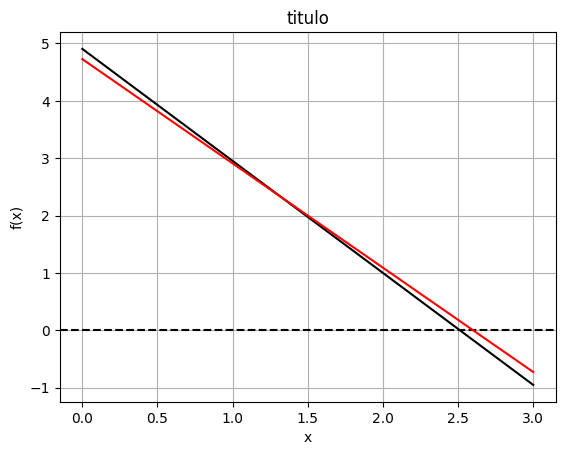

In [ ]:
plotar(f1, f2, "titulo", 0, 3)

###b) Por eliminação de Gauss com Pivotamento Parcial, de modo exato

In [ ]:
gauss([[1.05, 2.05], [1.1, 2]], [5.15, 5.1], 2)

array([1., 2.])

c) Por Eliminação de Gauss com Pivotamento Parcial, mas com 3 algarismos
significativos. Utilize aritmética de arredondamento.

In [ ]:
gaussA([[1.05, 2.05], [1.1, 2]], [5.15, 5.1], 2)

array([0.9871959 , 2.00704225])

d)Justifique os resultados obtidos.

Na letra C, o algoritmo arredonda o valor para 3 casas decimais em diversos pontos, o que acarreta em uma perda de precisão em relação ao algoritmo original, mais exato. Isso permite gerar uma aproximação satisfatória dos valores reais, sem precisar trabalhar com números tão compridos.